# **ML-Based Intrusion Detection System (IDS)**
# Model Construction and Evaluation

### Gregorio Mendoza Serrano


---

# Libraries and Dependencies

---

First, let's import the necessary libraries and dependencies:

In [ ]:
# !pip install --upgrade scikit-learn
# !pip install scikit-plot
# !pip install --upgrade shap

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np
import zipfile
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt
import shap


---

# Function Definition

---

The following code defines a function called `extract` that extracts the contents of a compressed file and then deletes the compressed file. The function takes one parameter:

- `file`: The path to the compressed file.

The function performs the following tasks:

1. Extracts the contents of the ZIP file.
2. Deletes the ZIP file after extraction.

In [3]:
def extract(file):
    """
    Function that extracts a compressed file and deletes it
    """
    # Extract the contents of the zip file
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall()

    # Delete the zip file after extracting its contents
    os.remove(file)

The following code defines a function called `plot_history_metrics` that plots the performance metrics of a neural network over epochs. The function takes three parameters:

- `history`: The training history returned by the model.
- `metric`: The evaluation metric to be plotted.
- `title`: The name of the image that will be stored.

The function performs the following tasks:

1. Extracts the training and validation metrics from the history object.
2. Extracts the training and validation loss from the history object.
3. Plots the training and validation metrics over epochs.
4. Plots the training and validation loss over epochs.
5. Saves the plots as an image.


In [4]:
# Function to plot performance metrics by epochs for a neural network
# param history - training history returned by the model
# param metric - evaluation metric
# param title - name of the image that is stored

def plot_history_metrics(history, metric, title):
  """
  Function to plot performance metrics by epochs for a neural network
  param history - training history returned by the model
  param metric - evaluation metric
  param title - name of the image that is stored
  """

  # List of metric results by epoch
  acc = history.history[metric]
  val_acc = history.history['val_'+str(metric)]

  # List of loss metric results by epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Number of epochs
  epochs = range(len(acc))

  # Plot training and validation metrics
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  fig.suptitle('Metrics per epoch')
  color1 = "#4072c4"
  ax[0].plot(epochs, acc, label='Training')
  ax[0].plot(epochs, val_acc, label='Validation')
  ax[0].set_title(f'Training and validation {metric}')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel(metric)
  ax[0].legend()

  # Plot training and validation loss
  ax[1].plot(epochs, loss, label='Training')
  ax[1].plot(epochs, val_loss, label='Validation')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Loss')
  ax[1].legend()
  plt.savefig(f'Metrics_per_epoch_{title}.png')
  plt.show()


The following code defines a function called `classification_metrics` that displays evaluation metrics for classification problems. The function takes two parameters:

- `y_test`: The test set labels.
- `y_pred`: The predicted labels.

The function performs the following tasks:

1. Calculates and prints the accuracy of the model.
2. Calculates and prints the F1-score of the model.
3. Calculates and prints the recall and precision of the model.
4. Generates and prints a detailed classification report.

In [5]:
# Function that displays evaluation metrics for classification problems
# param y_test - y test set
# param y_pred - predictions

def classification_metrics(y_test, y_pred):
  """
  Function that displays evaluation metrics for classification problems
  param y_test - y test set
  param y_pred - predictions
  """

  print(f'\n#---------------Evaluation Metrics Report------------------#\n')
  # Accuracy
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy:.4f}')

  # F1-Score
  f1 = metrics.f1_score(y_test, y_pred, average='weighted')
  print(f'\nF1-Score: {f1:.4f}')

  # Recall and Precision
  recall = metrics.recall_score(y_test, y_pred, average='weighted')
  precision = metrics.precision_score(y_test, y_pred, average='weighted')
  print(f'\nRecall: {recall:.4f}')
  print(f'\nPrecision: {precision:.4f}')

  # Classification report
  report = metrics.classification_report(y_test, y_pred)
  print(f'\nDetailed Report:\n\n {report}')

  print(f'\n#----------------------------End-----------------------------#\n')


The following code defines a function called `my_confusion_matrix` that plots the confusion matrix for a classification problem. The function takes four parameters:

- `y_test`: The test set labels.
- `y_pred`: The predicted labels.
- `labels`: The labels of the predictions.
- `title`: The name of the image that will be stored.

The function performs the following tasks:

1. Calculates the confusion matrix using the test set labels and predicted labels.
2. Creates a DataFrame from the confusion matrix for better visualization.
3. Plots the confusion matrix using a heatmap.
4. Saves the plot as an image.

In [6]:
# Function that plots the confusion matrix for a classification problem
# param y_test - y test set
# param y_pred - predictions
# param labels - prediction labels
# param title - name of the image that is stored

def my_confusion_matrix(y_test, y_pred, labels, title):
  """
  Function that plots the confusion matrix for a classification problem
  param y_test - y test set
  param y_pred - predictions
  param labels - prediction labels
  param title - name of the image that is stored
  """

  plabels = ["Pred. " + label for label in labels]

  cm = metrics.confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(cm, index=labels, columns=plabels)

  # Visualize the confusion matrix in an enhanced way
  print('\n')
  plt.figure(figsize=(6,4))
  sns.heatmap(df_cm, annot=True, fmt='g', cmap=sns.diverging_palette(220, 20, as_cmap=True), linewidths=.5)

  plt.title('Confusion Matrix', fontsize=20)
  plt.ylabel('True Label', fontsize=15)
  plt.xlabel('Predicted Label', fontsize=15)
  plt.savefig(f'Confusion_matrix_{title}.png')
  plt.show()




The following code defines a function called `roc` that plots the ROC curve for a classification problem. The function takes three parameters:

- `y_test`: The test set labels.
- `y_pred`: The predicted probabilities.
- `title`: The name of the image that will be stored.

The function performs the following tasks:

1. Calculates the parameters for the ROC curve (false positive rate, true positive rate, and threshold).
2. Computes the AUC (Area Under the Curve).
3. Plots the ROC curve and saves the plot as an image.



In [7]:
# Function that draws the ROC curve for a classification problem
# param y_test - y test set
# param y_pred - predictions
# param title - name of the image that is stored

def roc(y_test, y_pred, title):
  """
  Function that draws the ROC curve for a classification problem
  param y_test - y test set
  param y_pred - predictions
  param title - name of the image that is stored
  """

  color1 = "#4072c4"

  # Calculate parameters for the ROC curve (false positive rate, true positive rate, and threshold)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
  print(f'False Positive Rate:\n {fpr[:10]}\n')
  print(f'True Positive Rate:\n {tpr[:10]}\n')
  print(f'Threshold:\n {thresholds[:10]}\n')

  # Calculate the AUC
  roc_auc = metrics.auc(fpr, tpr)

  print(f'AUC (Area Under the Curve): {roc_auc:.4f}\n')

  # Draw the ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color=color1, lw=2, label=f'AUC = {roc_auc:.2f}')
  plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.savefig(f'ROC_{title}.png')
  plt.show()


The following code defines a function called `comparador` that compares the evaluation metrics of various classification models. The function takes three parameters:

- `y_test`: The test set labels.
- `predicciones`: A dictionary where the key is the model name and the value is the predicted probability.
- `title`: The name of the image that will be stored.

The function performs the following tasks:

1. Creates a DataFrame to store the evaluation metrics (Accuracy, F1-score, Recall, Precision, AUC-ROC) for each model.
2. Plots the ROC curves for each model and saves the plot as an image.
3. Prints a detailed classification report for each model, including precision, recall, and F1-score for each class.
4. Displays the DataFrame containing the evaluation metrics for all models.

The function uses the ROC curve and AUC to visualize the performance of each model and provides a comprehensive comparison of their evaluation metrics.


In [8]:
# Function that displays a comparison of evaluation metrics for various
# classification models
# param y_test - y test set
# param prediccion - dictionary key=model name, value=prediction probability
# param title - name of the image that is stored

def comparador(y_test, predicciones, title):
  """
  Function that displays a comparison of evaluation metrics for various
  classification models
  param y_test - y test set
  param prediccion - dictionary key=model name, value=prediction probability
  param title - name of the image that is stored
  """

  df = pd.DataFrame({'Metric': ['Accuracy', 'F1-score', 'Recall', 'Precision','AUC-ROC']})

  # Create a subplot
  fig, ax = plt.subplots(1, len(predicciones), figsize=(18, 6))
  fig.suptitle('ROC Curve Comparison')
  color1 = "#4072c4"

  for modelo, y_pred in predicciones.items():
    y_pred_bin = tf.round(y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    df[modelo] = [
        f'{metrics.accuracy_score(y_test, y_pred_bin)*100:.2f}%',
        f"{metrics.f1_score(y_test, y_pred_bin, average='weighted')*100:.2f}%",
        f"{metrics.recall_score(y_test, y_pred_bin, average='weighted')*100:.2f}%",
        f"{metrics.precision_score(y_test, y_pred_bin, average='weighted')*100:.2f}%",
        f'{metrics.auc(fpr, tpr)*100:.2f}%'
    ]
    # Draw the ROC curve
    ax[list(predicciones.keys()).index(modelo)].set_title(modelo)
    ax[list(predicciones.keys()).index(modelo)].plot(fpr, tpr, color=color1, lw=2, label=f'AUC {df.at[4, modelo]}')
    ax[list(predicciones.keys()).index(modelo)].plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
    ax[list(predicciones.keys()).index(modelo)].set_xlabel("False Positive Rate")
    ax[list(predicciones.keys()).index(modelo)].set_ylabel("True Positive Rate")
    ax[list(predicciones.keys()).index(modelo)].legend()

    # Create a table to display detailed metrics
    report_model = metrics.classification_report(y_test, y_pred_bin, output_dict=True)
    print(f"\nModel {modelo}:\n")
    print("{:<10} {:<10} {:<10} {:<10}".format('Class', 'Precision', 'Recall', 'F1-score'))
    for clase, metricas in report_model.items():
        if clase.isdigit():  # Ignore if the key is not a number (could be 'macro avg', 'weighted avg', etc.)
            print("{:<10} {:<10.2f} {:<10.2f} {:<10.2f}".format(clase, metricas['precision'], metricas['recall'], metricas['f1-score']))

  print(f'\n{df}\n')
  plt.savefig(f'ROC_comparative_{title}.png')
  plt.show()



---

# Import of Dataset

---

Let's download the dataset first:

In [10]:
!gdown 1Ki4Qcb-xaNlCHWypLpzH-aNHFWPLVRm4

Downloading...
From (original): https://drive.google.com/uc?id=1Ki4Qcb-xaNlCHWypLpzH-aNHFWPLVRm4
From (redirected): https://drive.google.com/uc?id=1Ki4Qcb-xaNlCHWypLpzH-aNHFWPLVRm4&confirm=t&uuid=8524be86-44b7-4dfe-ba0f-8201be914fd4
To: /content/df_ids_v1.zip
100% 85.0M/85.0M [00:04<00:00, 21.1MB/s]


The following cell performs the following tasks:

1. Extracts the contents of the ZIP file.
2. Reads multiple CSV files into separate DataFrames.
3. Concatenates these DataFrames into a single DataFrame.
4. Displays the first few rows of the concatenated DataFrame to verify that it was created correctly.

In [11]:
# Extract the contents of the ZIP file
extract('df_ids_v1.zip')

# Read all CSV files into DataFrames
df1 = pd.read_csv("df_ids_0_B_v1.csv")
df2 = pd.read_csv("df_ids_1_B_v1.csv")
df3 = pd.read_csv("df_ids_2_B_v1.csv")
df4 = pd.read_csv("df_ids_3_B_v1.csv")

# Create a single DataFrame with the curated data
df = pd.concat([df1, df2, df3, df4], axis=0)

# Verify that the DataFrame was created correctly
df.head()

We then plot the info of the DataFrame columns:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851750 entries, 0 to 205261
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Flow_Duration           851750 non-null  int64  
 1   Bwd_Packet_Length_Mean  851750 non-null  float64
 2   Bwd_Packet_Length_Std   851750 non-null  float64
 3   Flow_IAT_Std            851750 non-null  float64
 4   Fwd_IAT_Total           851750 non-null  int64  
 5   Fwd_IAT_Std             851750 non-null  float64
 6   Packet_Length_Mean      851750 non-null  float64
 7   Packet_Length_Std       851750 non-null  float64
 8   Avg_Bwd_Segment_Size    851750 non-null  float64
 9   Idle_Mean               851750 non-null  float64
 10  Label                   851750 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 78.0 MB


We now display the amount of 'benign' and 'attack' registries in the DataFrame.

In [16]:
ataque = (df['Label'] == 1).sum()
benigno = (df['Label'] == 0).sum()

print("Cantidad de registros sobre ataques:", ataque)
print("Cantidad de registros benignos:", benigno)

Cantidad de registros sobre ataques: 425875
Cantidad de registros benignos: 425875



---

# Model Implementation

---

The following code splits the dataset into training and testing sets for use in machine learning models.


In [17]:
# Split the data for use in our models
X = df.drop(columns='Label')
y = df['Label']
train_ratio = 0.70

# We also use 60% as training data to use the same data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42, shuffle=True, stratify=y)

# In this case, we do not need a validation set
print(f'Conjunto de entrenamiento: {X_train.shape[0]} observaciones\n')
print(f'Conjunto de test: {X_test.shape[0]} observaciones\n')


Conjunto de entrenamiento: 596224 observaciones

Conjunto de test: 255526 observaciones



## **Model 1 (Random Forest)**

Creation and training of a Random Forest Algorithm:

In [18]:
Random_Forest = RandomForestClassifier(max_depth=40)
Random_Forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=40)

Let's then perform the cross-validation:

In [19]:
RF_cv_scores = cross_val_score(Random_Forest, X_train, y_train, cv=5)
print(f'\n Validación cruzada 5-fold puntuaciones: \n')
print(f'   Precisión media: {RF_cv_scores.mean():.4f}\n')
print(f'   Desviación estándar: {RF_cv_scores.std():.4f}\n')


 Validación cruzada 5-fold puntuaciones: 

   Precisión media: 0.9946

   Desviación estándar: 0.0003



We perform cross-validation to ensure that the model does not produce overfitting. As we can observe, the average accuracy of each subset is very high, and there is minimal variation in accuracy between subsets.

In [20]:
RF_y_pred = Random_Forest.predict(X_test)
RF_y_pred_prob = Random_Forest.predict_proba(X_test)[:,1]

### **Evaluation**

1. **Selection of Metrics**

   - To evaluate a classification model for detecting intrusions over a network protocol, we will use the following evaluation metrics:
       - **Accuracy** will give us a general measure of the model's precision (proportion of correct predictions). However, since the dataset is naturally imbalanced, with the number of malicious packets being much lower than the number of benign packets, the model may classify benign packets well but poorly classify malicious ones. Therefore, we need to consider additional metrics.
       - **Precision** tells us the proportion of positive predictions that are correct. Precision is important to ensure that predictions of the minority class are accurate.
       - **Recall** tells us the proportion of actual positive cases that are correctly predicted. We must pay particular attention to malicious packets that are correctly classified, as this metric is crucial. Additionally, it is essential to ensure that instances of the minority class are identified.
       - **F1-Score** provides a balance between precision and recall.
       - **AUC-ROC** is useful because it is insensitive to class imbalance and provides a measure of the model's performance at different thresholds. It will be useful for comparing the two proposed models.


2. **Representation of Metrics**

In [21]:
classification_metrics(y_test, RF_y_pred)


#---------------Reporte métricas evaluación------------------#

Accuracy: 0.9946

F1-Score: 0.9946

Recall: 0.9946

Precision: 0.9946

Reporte detallado:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99    127763
           1       1.00      0.99      0.99    127763

    accuracy                           0.99    255526
   macro avg       0.99      0.99      0.99    255526
weighted avg       0.99      0.99      0.99    255526


#----------------------------Fin-----------------------------#



### **Results**

The results are extraordinary, with nearly 100% accuracy in classifying benign packets and 99% accuracy in classifying malicious packets. In terms of correct predictions, the model achieves 99% accuracy for benign packets and almost 100% for attacks. We observe stability in the metric results, which adds robustness to the model's outcomes.



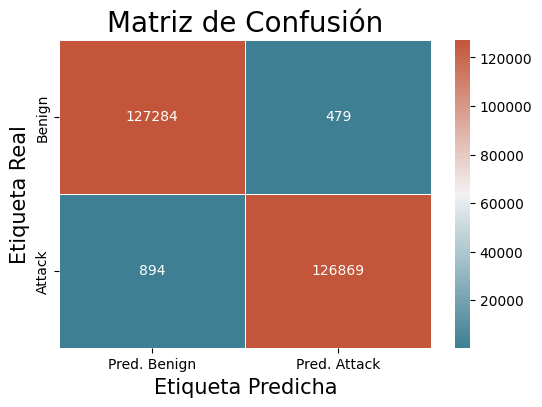

In [22]:
labels = ['Benign', 'Attack']
my_confusion_matrix(y_test, RF_y_pred, labels, 'RandomForest')

Let's examine the successful and failed prediction cases:

Benign:

- Actual cases: 127,763
- Correct predictions: 127,282
- Errors: 481

Attacks:

- Actual cases: 127,763
- Correct predictions: 126,878
- Errors: 885



There is a slightly higher percentage of false negatives compared to false positives, although the priority is to reduce false negatives (actual attacks classified as benign). With the obtained metrics, this small imbalance can be overlooked.


Tase de falsos positivos:
 [0.         0.00045397 0.00045397 0.00045397 0.00045397 0.00045397
 0.00046179 0.00046179 0.00046179 0.00046179]

Tasa de verdaderos positivos:
 [0.         0.89287196 0.89297371 0.89300502 0.89311459 0.89315373
 0.89320069 0.89325548 0.8952905  0.89529833]

Umbral:
 [       inf 1.         0.99988372 0.99981818 0.99976744 0.99973684
 0.99941176 0.99901099 0.99869933 0.99863372]

AUC (Área bajo la curva): 0.9990



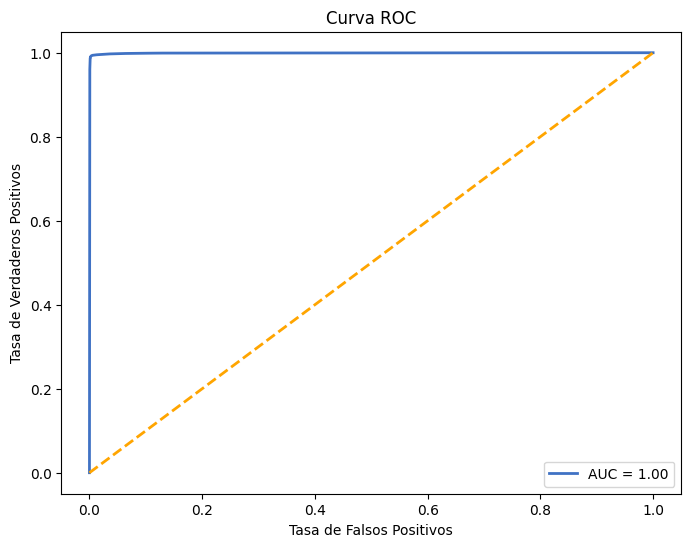

In [23]:
roc(y_test, RF_y_pred_prob, 'RandomForest')


We observe the ROC curve almost entirely in the upper left corner, indicating nearly perfect classification capability for different thresholds. The AUC confirms that the area under the curve is the maximum.

## **Model 2 (KNN):**



In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
KNN_cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print(f'\n Validación cruzada 5-fold puntuaciones: \n')
print(f'   Precisión media: {KNN_cv_scores.mean():.4f}\n')
print(f'   Desviación estándar: {KNN_cv_scores.std():.4f}\n')


 Validación cruzada 5-fold puntuaciones: 

   Precisión media: 0.9882

   Desviación estándar: 0.0003



We perform cross-validation to ensure that the model does not produce overfitting. As we can observe, the average accuracy of each subset is very high, and there is minimal variation in accuracy between subsets.


In [26]:
# Generamos predicciones
KNN_y_pred = knn.predict(X_test)
KNN_y_pred_prob = knn.predict_proba(X_test)[:,1]


### **Evaluation**

1. **Representation of Metrics**



In [27]:
classification_metrics(y_test, KNN_y_pred)


#---------------Reporte métricas evaluación------------------#

Accuracy: 0.9884

F1-Score: 0.9884

Recall: 0.9884

Precision: 0.9884

Reporte detallado:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99    127763
           1       0.99      0.99      0.99    127763

    accuracy                           0.99    255526
   macro avg       0.99      0.99      0.99    255526
weighted avg       0.99      0.99      0.99    255526


#----------------------------Fin-----------------------------#



The results are also very good, with 99% accuracy in all metrics, although it is slightly less precise than Random Forest.

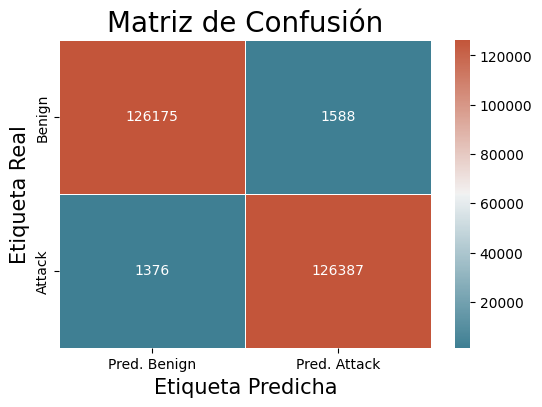

In [28]:
my_confusion_matrix(y_test, KNN_y_pred, labels, 'KNN')


Let's examine the successful and failed prediction cases:

Benign:

- Actual cases: 127,763
- Correct predictions: 126,175
- Errors: 1,588

Attacks:

- Actual cases: 127,763
- Correct predictions: 126,387
- Errors: 1,376

KNN increased the number of false negatives by 491 cases, which represents a 0.38% increase in errors. Overall, the results are also very good.

Tase de falsos positivos:
 [0.         0.00490752 0.00850011 0.01242926 0.01992752 0.04624187
 1.        ]

Tasa de verdaderos positivos:
 [0.         0.9723081  0.98541831 0.98923006 0.99203995 0.99502986
 1.        ]

Umbral:
 [inf 1.  0.8 0.6 0.4 0.2 0. ]

AUC (Área bajo la curva): 0.9947



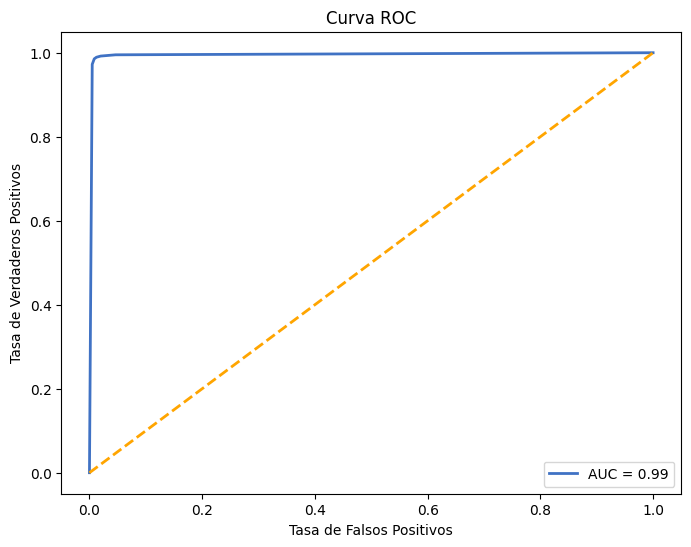

In [29]:
roc(y_test, KNN_y_pred_prob, 'KNN')

There is barely a slight curvature at the upper left peak of the curve. The AUC is 0.9947, which is 0.0053 less than Random Forest.

# **5. Comparison of Models**

### Calibration Curve

The below code cell creates a dictionary of predictions for two models: Random Forest and KNN. It then uses the `scikit-plot` library to plot the calibration curve for these models, comparing the predicted probabilities to the actual outcomes.


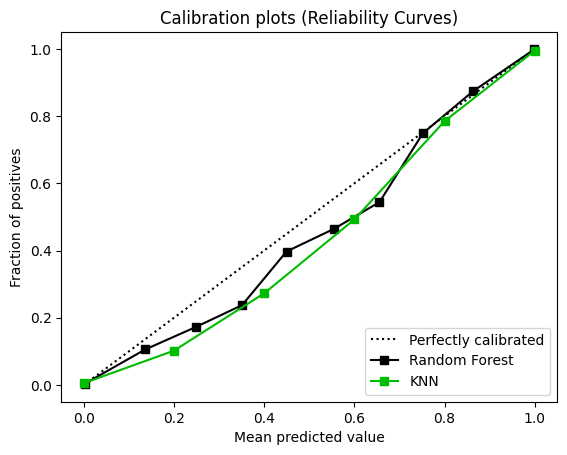

In [30]:
predicciones = {'Random Forest': RF_y_pred_prob,
                'KNN': KNN_y_pred_prob}

skplt.metrics.plot_calibration_curve(y_test, list(predicciones.values()), list(predicciones.keys()))
plt.show()

This function allows us to visualize how the probabilities predicted by a classifier are calibrated compared to the frequency with which the actual events occur. It is a way to evaluate the quality of the probabilities predicted by the model.




Modelo Random Forest:

Clase      Precisión  Recall     F1-score  
0          0.99       1.00       0.99      
1          1.00       0.99       0.99      

Modelo KNN:

Clase      Precisión  Recall     F1-score  
0          0.99       0.99       0.99      
1          0.99       0.99       0.99      

     Métrica Random Forest     KNN
0   Accuracy        99.46%  98.84%
1   F1-score        99.46%  98.84%
2     Recall        99.46%  98.84%
3  Precision        99.46%  98.84%
4    AUC-ROC        99.90%  99.47%



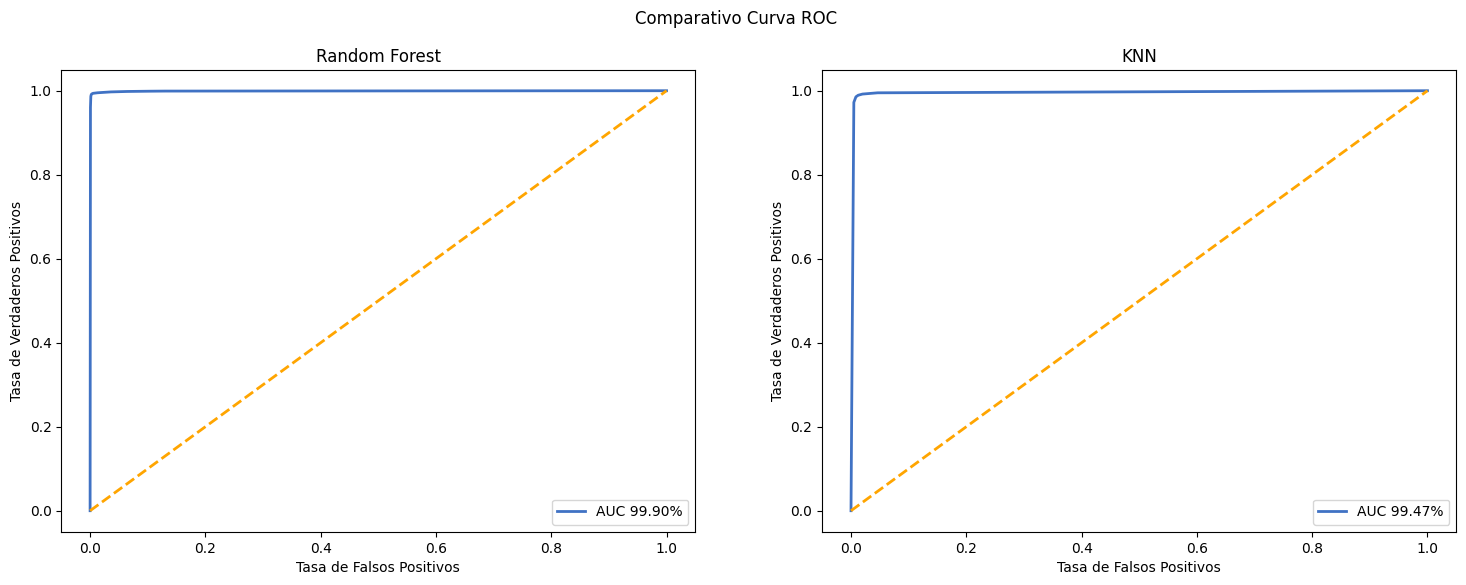

In [31]:
comparador(y_test, predicciones, 'RandomFores-KNN')

## **Analysis of Results**

### **Calibration Curve**

#### We observe that Random Forest is better calibrated across almost the entire spectrum of probabilities, except in the range of 0.7-0.8.

### **Evaluation Metrics**

#### The metrics are excellent for both models, although Random Forest is slightly more precise by 0.6 percentage points.

### **Result**

#### Random Forest is an algorithm that is relatively easy to explain. It has a computational cost, but in this case, with a simple configuration of hyperparameters and a maximum depth of 40 levels, the cost is manageable.

#### KNN is also a very simple algorithm to explain. It does not require training but has a memory consumption cost. It suffers from high dimensionality, but that is not the case here, and it is sensitive to irrelevant data, which could affect performance. However, the feature engineering work in our project is exhaustive.

#### Given the results, the most optimal model is **Random Forest**.

# **6. Explainability (XAI)**

The SHAP (SHapley Additive exPlanations) library is a powerful tool for interpreting machine learning models and understanding the contribution of each feature to the model's predictions.

We will use the graphics provided by the library to get an overview of how each feature affects the model's predictions.

## 1. Random Forest



In [38]:
RF_explainer = shap.Explainer(Random_Forest, X_train[:500])
RF_test_samples = shap.sample(X_test, 500)
RF_shap_values = RF_explainer(RF_test_samples)

100%|===================| 996/1000 [00:41<00:00]       

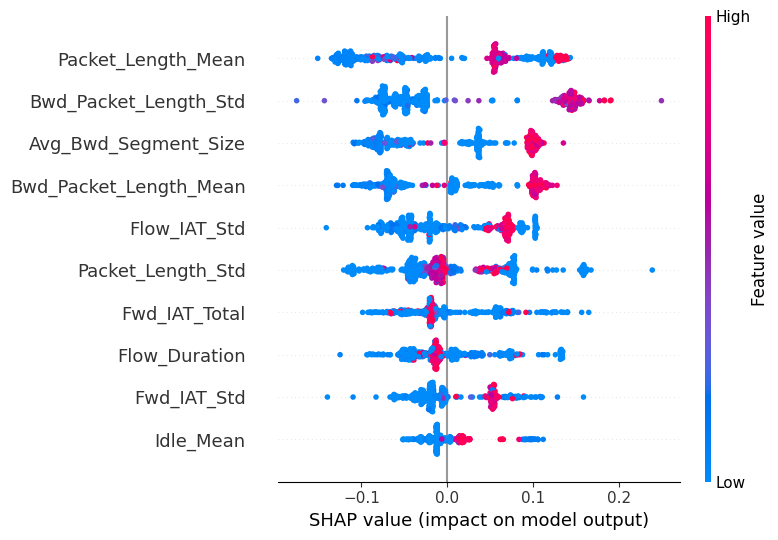

In [39]:
shap.summary_plot(RF_shap_values[:, :, 1], RF_test_samples)

In this graph, we can see the distribution of the contributions of each feature in a sample of 500 random observations.

The features are listed on the vertical axis. The higher a feature is in the graph, the more important it is to the model. Importance is measured in terms of the magnitude of its contribution to the model's predictions.

The color of the features indicates the direction of their effect on the prediction. Features that contribute to higher predictions are colored in red, while those that contribute to lower predictions are colored in blue.

In this example, **Packet_Length_Mean** is the most influential feature, and **Idle_Mean** is the least influential.


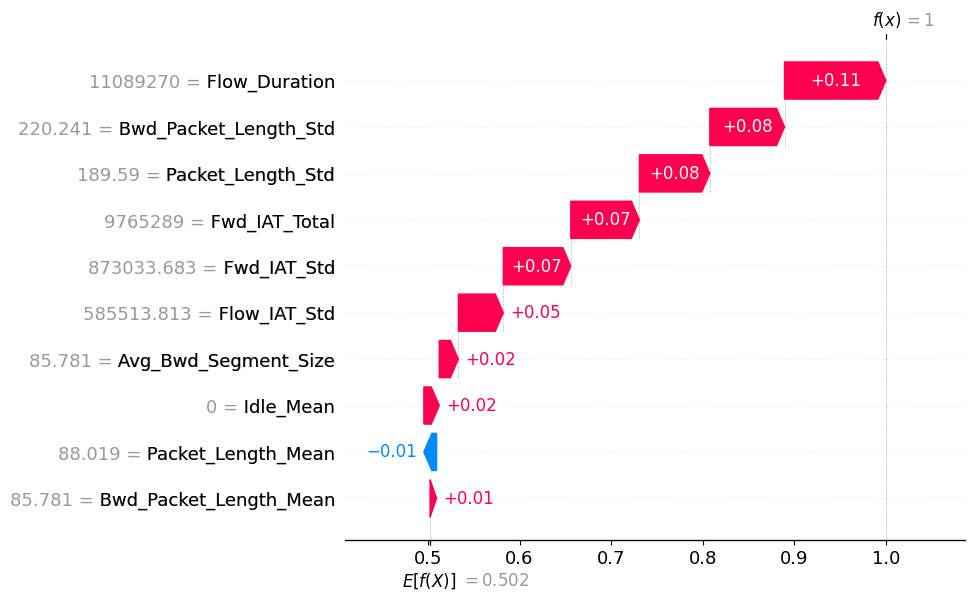

In [40]:
shap.plots.waterfall(RF_shap_values[0][:, 1])


This graph shows the contribution of each feature in a single prediction.

In this prediction example, Random Forest predicts an attack f(x) = 1. Let's look at the contribution of each feature to the prediction. Taking the mean of all predictions E[f(x)] = 0.502 as the starting value, we see how each feature positively or negatively modifies the starting value E[f(x)] to reach the final prediction f(x). The features are ordered vertically from highest to lowest contribution, so for this prediction, the feature that contributes the most is Flow_Duration (+0.11) and the least is Bwd_Packet_Length_Mean (+0.01).



## 2. Knn

In [37]:
KNN_explainer = shap.KernelExplainer(knn.predict_proba, shap.sample(X_train, 100))
KNN_test_samples = shap.sample(X_test, 100)
KNN_shap_values = KNN_explainer.shap_values(KNN_test_samples)

  0%|          | 0/100 [00:00<?, ?it/s]

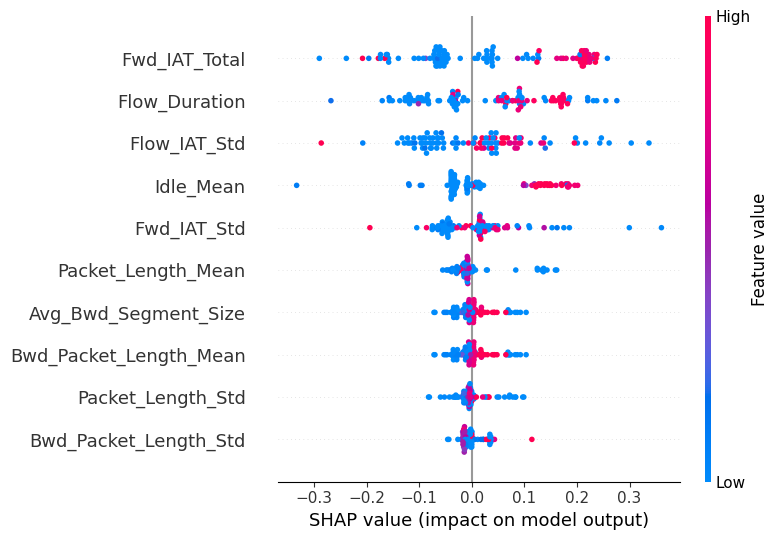

In [41]:
shap.summary_plot(KNN_shap_values[:, :, 1], KNN_test_samples)



In this graph, we can see the distribution of the contributions of each feature in a sample of 100 random observations, as the process is computationally expensive.

The features are listed on the vertical axis. The higher a feature is in the graph, the more important it is to the model. Importance is measured in terms of the magnitude of its contribution to the model's predictions.

The color of the features indicates the direction of their effect on the prediction. Features that contribute to higher predictions are colored in red, while those that contribute to lower predictions are colored in blue.

In this example, **Fwd_IAT_Total** is the most influential feature, and **Bwd_Packet_Length_Std** is the least influential.



In [42]:
shap.initjs()
shap.force_plot(KNN_explainer.expected_value[0], KNN_shap_values[:,:, 1], KNN_test_samples)

This interactive graph represents a distribution of the influence of each feature in each of the 100 observations.

The distributions of all features are represented, and the colors are interpreted the same way as in the previous graphs.

The X-axis represents the observations, and the Y-axis represents the value of the prediction. The reference value is the mean of the 100 predictions (approximately 0.46). Vertically, we can observe the contributions of each feature for that observation. The value of the prediction is the point farthest vertically from the reference value.

In this example, we can observe that the observations classified as attacks have the curve above, and those classified as benign have the curve below. If we hover the cursor over the distributions, it shows the values of the 4 most influential features, the observation, and the value of the prediction.

There is a dropdown on the vertical axis and another on the horizontal axis that allow configuring different views.

### Conclusions

To have a real comparative view of the two algorithms, SHAP values should be generated for the entire dataset, but this is computationally expensive. With these samples, we can explain the contribution of each feature to each prediction. Different predictions may have different contributions.

# **7. Model 3 "Experimental" (CNN):**




Let's start with the definition of the train, validation and test sets:

In [53]:
tf.random.set_seed(42)
X_CNN = np.expand_dims(X, axis=-1)

In [54]:
# Let's define 60% of data for training, 20% for validation and 20% for test
train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X_CNN, y, test_size=1 - train_ratio, random_state=42, shuffle=True, stratify=y)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42, shuffle=True, stratify=y_test)

print(f'Conjunto de entrenamiento: {X_train.shape[0]} observaciones\n')
print(f'Conjunto de test: {X_test.shape[0]} observaciones\n')

Conjunto de entrenamiento: 511050 observaciones

Conjunto de test: 170350 observaciones



The below code defines a neural network model using Keras. It includes convolutional layers, batch normalization, a fully connected layer, and a dropout layer. The model is compiled with binary cross-entropy loss and the Adam optimizer. The code also includes a function to verify the input shape of the data.


In [55]:
# Define the neural network
model = Sequential()

# Input layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(10,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Convolutional block 2
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))
# We use the sigmoid activation function since our model is binary.

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

# Verify the input shape
def verify_input_shape(model, X):
    # Get the first layer of the model (assuming it's the input layer)
    input_layer = model.layers[0]

    # Get the expected input shape from the layer config
    expected_input_shape = input_layer.input_shape[1:]

    # Get the actual input shape of the data
    actual_input_shape = X.shape[1:]

    # Compare the expected and actual input shapes
    if expected_input_shape == actual_input_shape:
        print("Input shape is correct:", expected_input_shape)
    else:
        print("Input shape mismatch:", expected_input_shape, "vs", actual_input_shape)

# Verify the input shape
verify_input_shape(model, X_CNN)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 8, 32)             128       
                                                                 
 batch_normalization_2 (Bat  (None, 8, 32)             128       
 chNormalization)                                                
                                                                 
 conv1d_3 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 batch_normalization_3 (Bat  (None, 6, 64)             256       
 chNormalization)                                                
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [56]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
15971/15971 [==============================] - 83s 5ms/step - loss: 0.2509 - accuracy: 0.9014 - val_loss: 0.1918 - val_accuracy: 0.9275
Epoch 2/20
15971/15971 [==============================] - 92s 6ms/step - loss: 0.1857 - accuracy: 0.9328 - val_loss: 0.1749 - val_accuracy: 0.9336
Epoch 3/20
15971/15971 [==============================] - 86s 5ms/step - loss: 0.1683 - accuracy: 0.9408 - val_loss: 0.1403 - val_accuracy: 0.9522
Epoch 4/20
15971/15971 [==============================] - 80s 5ms/step - loss: 0.1510 - accuracy: 0.9502 - val_loss: 0.1445 - val_accuracy: 0.9541
Epoch 5/20
15971/15971 [==============================] - 81s 5ms/step - loss: 0.1389 - accuracy: 0.9548 - val_loss: 0.1209 - val_accuracy: 0.9596
Epoch 6/20
15971/15971 [==============================] - 84s 5ms/step - loss: 0.1303 - accuracy: 0.9578 - val_loss: 0.1182 - val_accuracy: 0.9602
Epoch 7/20
15971/15971 [==============================] - 81s 5ms/step - loss: 0.1241 - accuracy: 0.9602 - val_loss: 0

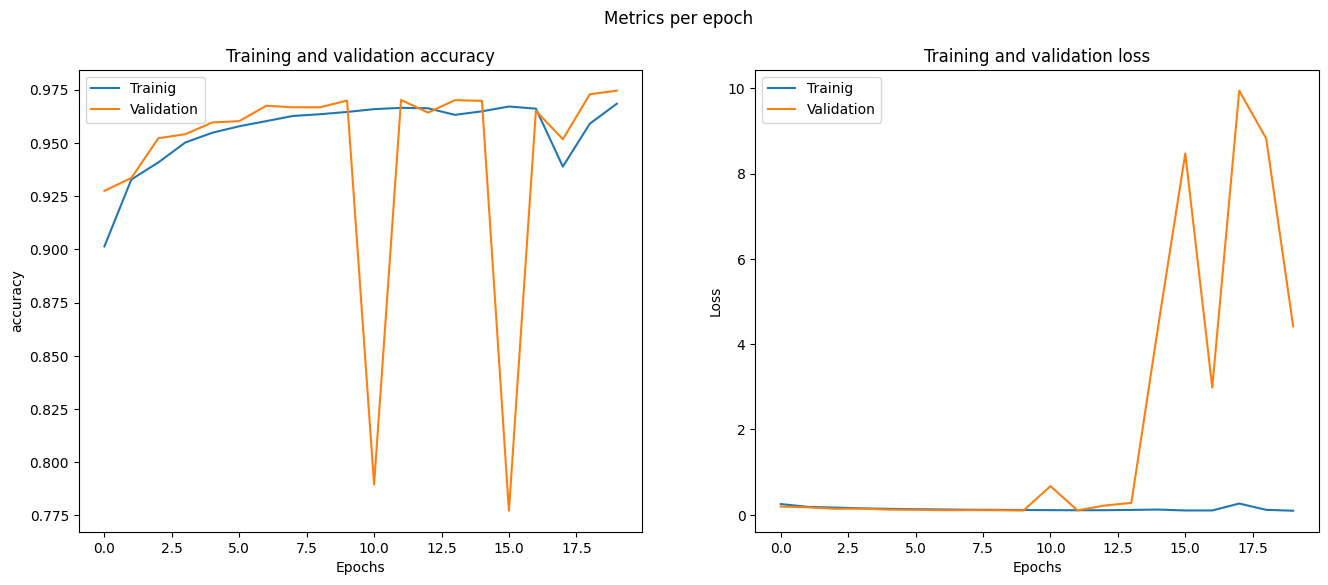

In [57]:
plot_history_metrics(history, 'accuracy', 'CNN')

The accuracy of the training and validation sets is oscillating by epochs, indicating instability in capturing the complexity of the data. Nevertheless, the accuracy is good.


In [58]:
y_pred_prob3 = model.predict(X_test)
y_pred3 = tf.round(y_pred_prob3) 

5324/5324 [==============================] - 11s 2ms/step


In [59]:
classification_metrics(y_test, y_pred3)


#---------------Reporte métricas evaluación------------------#

Accuracy: 0.9744

F1-Score: 0.9744

Recall: 0.9744

Precision: 0.9744

Reporte detallado:

               precision    recall  f1-score   support

           0       0.97      0.98      0.97     85175
           1       0.98      0.97      0.97     85175

    accuracy                           0.97    170350
   macro avg       0.97      0.97      0.97    170350
weighted avg       0.97      0.97      0.97    170350


#----------------------------Fin-----------------------------#




We observe generally good metrics. If we look at the details by class, for benign cases, we have better recall than precision, and for attack cases, it is the opposite.


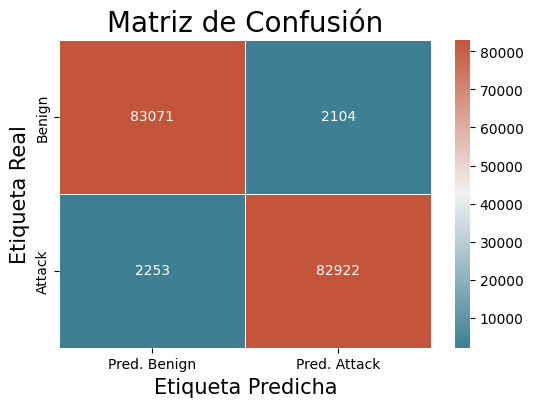

In [60]:
my_confusion_matrix(y_test, y_pred3, labels, 'CNN')


Let's examine the successful and failed prediction cases:

Benign:

- Actual cases: 85,175
- Correct predictions: 83,071
- Errors: 2,104

Attacks:

- Actual cases: 85,175
- Correct predictions: 82,922
- Errors: 2,253



We confirm the number of actual benign cases predicted as attacks, as shown by the Recall metric.


Tase de falsos positivos:
 [0.00000000e+00 1.17405342e-05 1.17405342e-05 1.17405342e-05
 1.17405342e-05 1.17405342e-05 1.17405342e-05 1.17405342e-05
 1.17405342e-05 1.17405342e-05]

Tasa de verdaderos positivos:
 [0.         0.00017611 0.00025829 0.00051658 0.00056355 0.00071617
 0.00084532 0.00089228 0.0009275  0.00093924]

Umbral:
 [       inf 1.         0.99999994 0.9999999  0.9999998  0.99999976
 0.9999997  0.99999964 0.9999996  0.9999995 ]

AUC (Área bajo la curva): 0.9952



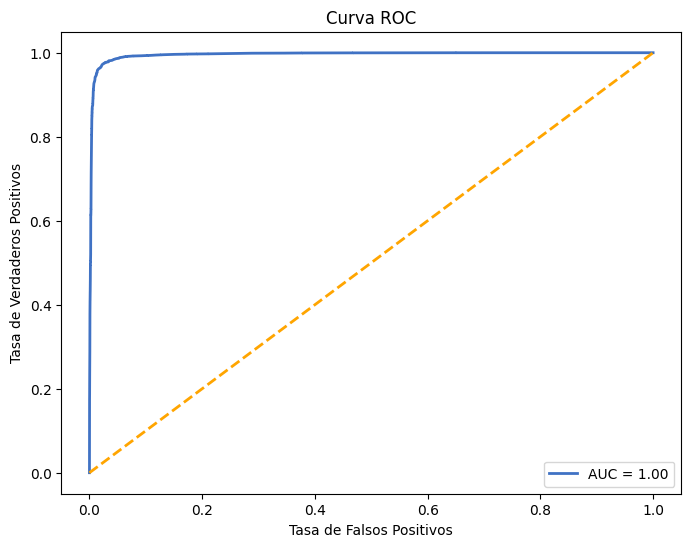

In [62]:
roc(y_test, y_pred_prob3, 'CNN')


We observe the ROC curve almost entirely in the upper left corner, indicating nearly perfect classification capability for different thresholds. The AUC confirms that the area under the curve is almost the maximum (0.9952).




In [63]:
model.save('CNN_entrenada.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



### Analysis of Results

We observe good metrics but significant instability in training and validation. Perhaps this type of neural network is not suitable for this problem, as the data is not matrix-based.